# Importing Dataset and pre processing

In [46]:
import pandas as pd
df=pd.read_csv('ais_disabling_events_final.csv')
df = df.drop('score', axis=1)
df.head()

,gap_hours,iuu_caught,spherical_distances,eez_check,exact _name new from diff Oceans,gear type,speed,ais_disable_time_division
0,13.016667,0,207.942845,0,North Atlantic Ocean,pole_and_line,15.975123,Morning
1,13.850000,0,9.704232,0,South Atlantic Ocean,fishing,0.700667,Dawn
2,33.733333,0,10.789069,1,North Atlantic Ocean,pole_and_line,0.319834,Dawn
3,30.650000,0,11.695860,1,North Atlantic Ocean,pole_and_line,0.381594,Afternoon
4,50.283333,0,93.113335,1,North Atlantic Ocean,pole_and_line,1.851773,Afternoon


In [47]:
df.shape

(55368, 8)

In [48]:
df['iuu_caught'].value_counts()

0    55129
1      239
Name: iuu_caught, dtype: int64

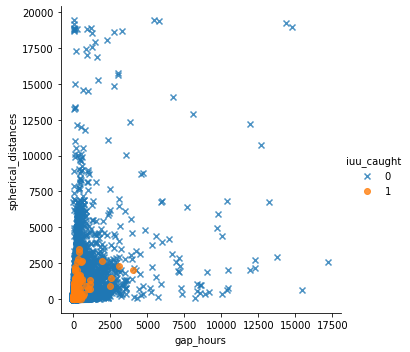

In [49]:
import seaborn as sns

sns.lmplot(x='gap_hours', y='spherical_distances', hue='iuu_caught', 
           markers=['x', 'o'],
           fit_reg=False, data=df)

In [50]:
index_names = df[df['gap_hours'] >= 5000].index
df.drop(index_names, inplace = True)

index_names = df[df['spherical_distances'] >= 7000].index
df.drop(index_names, inplace = True)

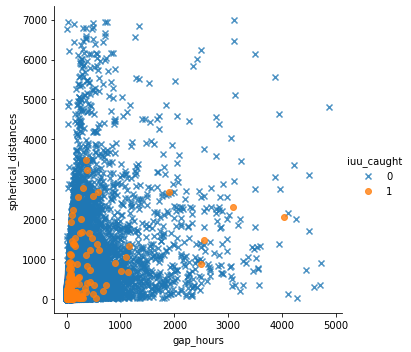

In [51]:
import seaborn as sns

sns.lmplot(x='gap_hours', y='spherical_distances', hue='iuu_caught', 
           markers=['x', 'o'],
           fit_reg=False, data=df)

<ipython-input-52-d755c1f20fae>:9: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool),


Correlation matrix is : 
                     gap_hours  iuu_caught  spherical_distances  eez_check  \
gap_hours             1.000000    0.026771             0.432375   0.036147   
iuu_caught            0.026771    1.000000             0.021905  -0.013338   
spherical_distances   0.432375    0.021905             1.000000   0.065051   
eez_check             0.036147   -0.013338             0.065051   1.000000   
speed                -0.124339   -0.003477             0.357743   0.083598   

                        speed  
gap_hours           -0.124339  
iuu_caught          -0.003477  
spherical_distances  0.357743  
eez_check            0.083598  
speed                1.000000  


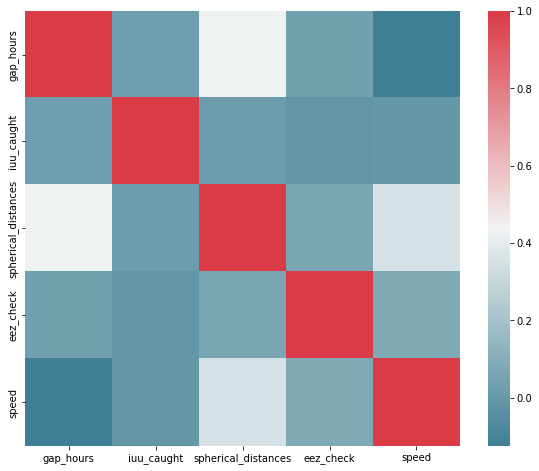

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# run correlation matrix and plot
f, ax = plt.subplots(figsize=(10, 8))
corr = df.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool),
            cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)


matrix = df.corr()
print("Correlation matrix is : ")
print(matrix)

## One Hot Encoding


In [53]:
print(df['gear type'].unique())
print(df['exact _name new from diff Oceans'].unique())
print(df['ais_disable_time_division'].unique())

['pole_and_line' 'fishing' 'set_longlines' 'fixed_gear' 'set_gillnets'
 'pots_and_traps' 'seiners' 'other_purse_seines' 'purse_seines' 'trollers'
 'dredge_fishing' 'drifting_longlines' 'other' 'trawlers' 'other_seines'
 'squid_jigger' 'tuna_purse_seines']
['North Atlantic Ocean' 'South Atlantic Ocean' 'Celtic Sea'
 'Southern Ocean' 'Mediterranean Sea - Eastern Basin' 'Norwegian Sea'
 'Barentsz Sea' 'Sea of Okhotsk' 'Japan Sea' 'Bering Sea' 'Gulf of Alaska'
 'Labrador Sea' 'Davis Strait' 'North Pacific Ocean' 'South Pacific Ocean'
 'Arafura Sea' 'Arabian Sea' 'Indian Ocean' 'Tasman Sea' 'Bismarck Sea'
 'Gulf of Guinea' 'Coral Sea' 'Bay of Bengal' 'Great Australian Bight'
 'Mozambique Channel' 'Caribbean Sea' 'Philippine Sea' 'Timor Sea'
 'Greenland Sea' 'North Sea' 'Laccadive Sea' 'Bass Strait'
 'Gulf of St. Lawrence' 'Baffin Bay' 'Gulf of Mexico' 'Solomon Sea']
['Morning' 'Dawn' 'Afternoon' 'Night' 'Twilight' 'Evening']


In [54]:
print(df['gear type'].value_counts())
print(df['exact _name new from diff Oceans'].value_counts())
print(df['ais_disable_time_division'].value_counts())

drifting_longlines    18602
squid_jigger          15450
tuna_purse_seines      8596
trawlers               7887
fishing                1906
set_longlines          1317
pole_and_line           597
pots_and_traps          386
fixed_gear              180
set_gillnets             81
purse_seines             75
trollers                 72
other                    34
other_purse_seines       30
dredge_fishing           24
seiners                   2
other_seines              2
Name: gear type, dtype: int64
North Pacific Ocean                  16068
South Pacific Ocean                  13352
South Atlantic Ocean                 11070
Indian Ocean                          5737
North Atlantic Ocean                  4741
Bering Sea                            1169
Coral Sea                              398
Sea of Okhotsk                         374
Barentsz Sea                           331
Gulf of Guinea                         287
Celtic Sea                             276
Arabian Sea          

In [55]:
one_hot_encoded_data = pd.get_dummies(df, columns = ['gear type', 'exact _name new from diff Oceans','ais_disable_time_division'])
print(one_hot_encoded_data.head())

   gap_hours  iuu_caught  spherical_distances  eez_check      speed  \
0  13.016667           0           207.942845          0  15.975123   
1  13.850000           0             9.704232          0   0.700667   
2  33.733333           0            10.789069          1   0.319834   
3  30.650000           0            11.695860          1   0.381594   
4  50.283333           0            93.113335          1   1.851773   

   gear type_dredge_fishing  gear type_drifting_longlines  gear type_fishing  \
0                         0                             0                  0   
1                         0                             0                  1   
2                         0                             0                  0   
3                         0                             0                  0   
4                         0                             0                  0   

   gear type_fixed_gear  gear type_other  ...  \
0                     0                0  .

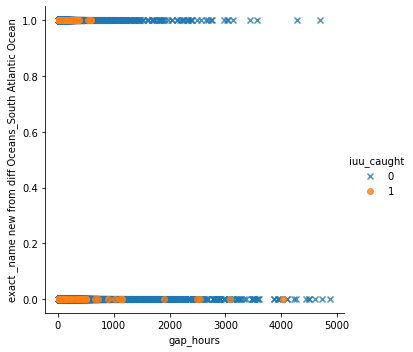

In [56]:
import seaborn as sns

sns.lmplot(x='gap_hours', y='exact _name new from diff Oceans_South Atlantic Ocean', hue='iuu_caught', 
           markers=['x', 'o'],
           fit_reg=False, data=one_hot_encoded_data)

## Test Train Split after One Hot Encoding

In [57]:
#### Independent and Dependent Features
X=one_hot_encoded_data.drop("iuu_caught",axis=1)
y=one_hot_encoded_data.iuu_caught

In [58]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=15, stratify=y)

In [59]:
y_train.value_counts()

0    33001
1      143
Name: iuu_caught, dtype: int64

# Normal ANN

In [60]:
print(len(X.columns))
n_inputs=len(X.columns)

63


In [61]:
# define model and set random seed as 42

import tensorflow as tf
import numpy as np
from tensorflow import keras
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
import tensorflow as tf

np.random.seed(42)
tf.random.set_seed(42)

model_normal = keras.Sequential([
        keras.layers.Dense(50, input_dim=n_inputs, activation='relu', kernel_initializer='he_uniform'),
        keras.layers.Dense(15, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')
    ])

# define loss and optimizer
model_normal.compile(loss='binary_crossentropy', optimizer='adam')
model_normal.fit(X_train,y_train,epochs=10)

Epoch 1/10
1036/1036 [==============================] - 54s 52ms/step - loss: 0.1720
Epoch 2/10
1036/1036 [==============================] - 2s 2ms/step - loss: 0.0862
Epoch 3/10
1036/1036 [==============================] - 5s 4ms/step - loss: 0.0609
Epoch 4/10
1036/1036 [==============================] - 2s 2ms/step - loss: 0.0840
Epoch 5/10
1036/1036 [==============================] - 5s 5ms/step - loss: 0.0494
Epoch 6/10
1036/1036 [==============================] - 4s 4ms/step - loss: 0.0464
Epoch 7/10
1036/1036 [==============================] - 4s 4ms/step - loss: 0.0447
Epoch 8/10
1036/1036 [==============================] - 5s 5ms/step - loss: 0.0468
Epoch 9/10
1036/1036 [==============================] - 3s 3ms/step - loss: 0.0429
Epoch 10/10
1036/1036 [==============================] - 4s 4ms/step - loss: 0.0411


In [62]:
# predict the y_test and find the roc_auc score

from sklearn.metrics import roc_auc_score
y_pred1=model_normal.predict(X_test)

print(roc_auc_score(y_test,y_pred1))

691/691 [==============================] - 1s 2ms/step
0.6471711039649712


In [63]:
# print y_pred1 which gives the probabilities of the likliehood of IUU fishing 

print(y_pred1)

[[1.1508156e-03]
 [2.8635763e-10]
 [3.2704074e-03]
 ...
 [1.4029673e-03]
 [2.0799787e-06]
 [1.2569346e-03]]


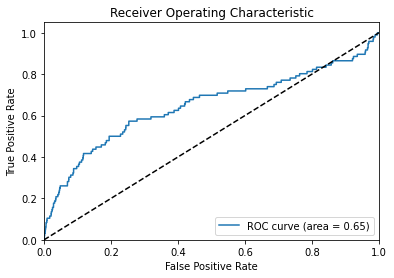

0.0045484323


In [64]:
# plot the ROC-AUC curve, find the nearest point to the top left of the graph that would be the optimal thereshold for y_pred1

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Compute false positive rate (FPR) and true positive rate (TPR)
fpr, tpr, thresholds = roc_curve(y_test, y_pred1)

# Compute the area under the curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


import numpy as np

# Find the index of the threshold that minimizes the Euclidean distance from (0,1)
idx = np.argmin((1-tpr)**2 + fpr**2)

# Retrieve the optimal threshold
optimal_threshold1 = thresholds[idx]

print(optimal_threshold1)

In [65]:
# find y_pred_rounded by using the threshold obtained above and then print the classification report and confusion matrix

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

y_pred1_rounded = np.where(y_pred1 > optimal_threshold1, 1, 0)
print(classification_report(y_test, y_pred1_rounded))

# Print the confusion matrix
cm = confusion_matrix(y_test, y_pred1_rounded)
print(cm)

              precision    recall  f1-score   support

           0       1.00      0.75      0.85     22001
           1       0.01      0.56      0.02        96

    accuracy                           0.75     22097
   macro avg       0.50      0.65      0.44     22097
weighted avg       0.99      0.75      0.85     22097

[[16430  5571]
 [   42    54]]


# Cost Sensitive Learning 

In [66]:
# assign weights to class, here we assigned weight 1 to class 0 the majority class and 
# weight of 750 to class 1 the minority class, the vessels engaged in IUU

weights_assigned={0:1,1:750}

In [67]:
# make the model and set the random seed as 41, this is the best one found using extensive grid search

import tensorflow as tf
import numpy as np
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
import tensorflow as tf

np.random.seed(41)
tf.random.set_seed(41)
# define model
model = Sequential()
# define first hidden layer and visible layer
model.add(Dense(n_inputs, input_dim=n_inputs, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(30, input_dim=n_inputs, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(10, input_dim=n_inputs, activation='relu', kernel_initializer='he_uniform'))
# define output layer
model.add(Dense(1, activation='sigmoid'))
# define loss and optimizer
model.compile(loss='binary_crossentropy', optimizer='adam')
model.fit(X_train,y_train,class_weight=weights_assigned,epochs=50)

Epoch 1/50
1036/1036 [==============================] - 4s 4ms/step - loss: 14.2158
Epoch 2/50
1036/1036 [==============================] - 4s 4ms/step - loss: 9.7634
Epoch 3/50
1036/1036 [==============================] - 6s 6ms/step - loss: 8.0489
Epoch 4/50
1036/1036 [==============================] - 6s 5ms/step - loss: 10.8680
Epoch 5/50
1036/1036 [==============================] - 4s 4ms/step - loss: 9.3073
Epoch 6/50
1036/1036 [==============================] - 4s 4ms/step - loss: 7.6166
Epoch 7/50
1036/1036 [==============================] - 5s 5ms/step - loss: 3.1099
Epoch 8/50
1036/1036 [==============================] - 3s 3ms/step - loss: 4.9572
Epoch 9/50
1036/1036 [==============================] - 4s 4ms/step - loss: 4.0441
Epoch 10/50
1036/1036 [==============================] - 6s 5ms/step - loss: 2.7993
Epoch 11/50
1036/1036 [==============================] - 4s 4ms/step - loss: 4.8228
Epoch 12/50
1036/1036 [==============================] - 4s 4ms/step - loss: 5.6377

In [68]:
# predict the values based on the model

y_pred=model.predict(X_test)

691/691 [==============================] - 1s 2ms/step


0.47577235
0.8007888845961546


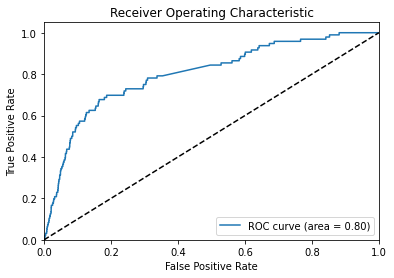

0.8199972
              precision    recall  f1-score   support

           0       1.00      0.81      0.90     22001
           1       0.02      0.69      0.03        96

    accuracy                           0.81     22097
   macro avg       0.51      0.75      0.46     22097
weighted avg       0.99      0.81      0.89     22097

[[17889  4112]
 [   30    66]]


In [69]:
# find the roc_auc score and then plot the graph and then find the optimal threshold by finding the point closest to the top left of the graph

print(np.mean(y_pred))

from sklearn.metrics import roc_auc_score

print(roc_auc_score(y_test,y_pred))

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Compute false positive rate (FPR) and true positive rate (TPR)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Compute the area under the curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

import numpy as np

# Find the index of the threshold that minimizes the Euclidean distance from (0,1)
idx = np.argmin((1-tpr)**2 + fpr**2)

# Retrieve the optimal threshold
optimal_threshold = thresholds[idx]

print(optimal_threshold)

y_pred_rounded = np.where(y_pred > optimal_threshold, 1, 0)

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_rounded))

from sklearn.metrics import confusion_matrix

# Print the confusion matrix
cm = confusion_matrix(y_test, y_pred_rounded)
print(cm)

#### Search for the best seed

In [23]:
import numpy as np
import tensorflow as tf
from sklearn.metrics import roc_auc_score
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD
from sklearn.metrics import confusion_matrix , classification_report

results = []
seeds = [0, 42, 123, 456, 789, 1024]

for seed in range(0,50):
    np.random.seed(seed)
    tf.random.set_seed(seed)
    
    model_test = Sequential()
    # define first hidden layer and visible layer
    model_test.add(Dense(n_inputs, input_dim=n_inputs, activation='relu', kernel_initializer='he_uniform'))
    model_test.add(Dense(30, input_dim=n_inputs, activation='relu', kernel_initializer='he_uniform'))
    model_test.add(Dense(10, input_dim=n_inputs, activation='relu', kernel_initializer='he_uniform'))
    # define output layer
    model_test.add(Dense(1, activation='sigmoid'))
    # define loss and optimizer
    model_test.compile(loss='binary_crossentropy', optimizer='adam')
    model_test.fit(X_train,y_train,class_weight=weights_assigned,epochs=50)
    
    # Make predictions on the validation set
    y_pred_temp=model_test.predict(X_test)
    
    # # Calculate the ROC AUC score
    # fpr, tpr, thresholds = roc_curve(y_test, y_pred_temp)

    # # Compute the area under the curve (AUC)
    # roc_auc = auc(fpr, tpr)

    # # Find the index of the threshold that minimizes the Euclidean distance from (0,1)
    # idx = np.argmin((1-tpr)**2 + fpr**2)

    # # Retrieve the optimal threshold
    # optimal_threshold1 = thresholds[idx]

    # y_pred_rounded_test = np.where(y_pred_temp > optimal_threshold1, 1, 0)

    score = roc_auc_score(y_test, y_pred_temp)
    print(score)
    print(seed)
    results.append(score)

# Find the seed that results in the highest ROC AUC score
max_value = max(results)
max_index = results.index(max_value)
print("best seed = ", max_value)
print("best seed index = ", max_index)

# best_seed = seeds[np.argmax(results)]
# print("Best seed:", best_seed)
print(results)

Epoch 1/50
1036/1036 [==============================] - 7s 5ms/step - loss: 13.4941
Epoch 2/50
1036/1036 [==============================] - 5s 5ms/step - loss: 2.5298
Epoch 3/50
1036/1036 [==============================] - 2s 2ms/step - loss: 2.6170
Epoch 4/50
1036/1036 [==============================] - 2s 2ms/step - loss: 5.9217
Epoch 5/50
1036/1036 [==============================] - 2s 2ms/step - loss: 2.5560
Epoch 6/50
1036/1036 [==============================] - 3s 3ms/step - loss: 2.2295
Epoch 7/50
1036/1036 [==============================] - 3s 3ms/step - loss: 2.4299
Epoch 8/50
1036/1036 [==============================] - 2s 2ms/step - loss: 2.2203
Epoch 9/50
1036/1036 [==============================] - 2s 2ms/step - loss: 2.4425
Epoch 10/50
1036/1036 [==============================] - 2s 2ms/step - loss: 2.5766
Epoch 11/50
1036/1036 [==============================] - 2s 2ms/step - loss: 2.4239
Epoch 12/50
1036/1036 [==============================] - 3s 3ms/step - loss: 2.1002


In [20]:
results

[0.7027384171931579,
 0.6433244511613108,
 0.6017174408738997,
 0.6997858998833385,
 0.6002250844658577,
 0.6355061512355499,
 0.7393650667393906,
 0.6127578954744481,
 0.7118097378149478,
 0.7850164007696621,
 0.6922360536642274,
 0.7272600298471282,
 0.6034550512855477,
 0.7255228928988077,
 0.7346517393148796,
 0.7940529218368861,
 0.7169910837386179,
 0.6929209183673469,
 0.5672516779540324,
 0.6724836371074042,
 0.6781616460615426,
 0.5520901985515809,
 0.6494018264321318,
 0.687553501355999,
 0.7324442165507629,
 0.7108940597397088,
 0.7085454449040196,
 0.7442978444161628,
 0.6149067087859642,
 0.7146654318743088,
 0.4999545475205673,
 0.7155008579155493,
 0.6980909011711588,
 0.6973167886308198,
 0.7866787305122495,
 0.6348532453070315,
 0.5964679162310804,
 0.5887369702892293,
 0.7666711172219445,
 0.711869630925867,
 0.7280528441889004,
 0.8007888845961546,
 0.748199892429132,
 0.7586828439616381,
 0.7361514344044969,
 0.735818826416981,
 0.6003150424980681,
 0.78780770381649

# XGBoost

In [27]:
# estimate a value for the scale_pos_weight xgboost hyperparameter
from sklearn.datasets import make_classification
from collections import Counter
# count examples in each class
counter = Counter(y_train)
# estimate scale_pos_weight value
estimate = counter[0] / counter[1]
print('Estimate: %.3f' % estimate)
print(counter)

Estimate: 230.776
Counter({0: 33001, 1: 143})


In [28]:
# fit balanced xgboost on an imbalanced classification dataset
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from xgboost import XGBClassifier
# define model
xgb = XGBClassifier(scale_pos_weight=1000)
# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(xgb, X_train, y_train, scoring='roc_auc', cv=cv, n_jobs=-1)
# summarize performance
print('Mean ROC AUC: %.5f' % mean(scores))

Mean ROC AUC: 0.87897


In [29]:
# Fitting the classifier on training data
xgb.fit(X_train, y_train)

# Making predictions on test data
y_pred_xgb = xgb.predict(X_test)

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_xgb))

from sklearn.metrics import confusion_matrix

# Print the confusion matrix
cm = confusion_matrix(y_test, y_pred_xgb)
print(cm)

              precision    recall  f1-score   support

           0       1.00      0.76      0.86     22001
           1       0.01      0.79      0.03        96

    accuracy                           0.76     22097
   macro avg       0.51      0.77      0.44     22097
weighted avg       0.99      0.76      0.86     22097

[[16656  5345]
 [   20    76]]


In [ ]:
# grid search positive class weights with xgboost for imbalance classification
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from xgboost import XGBClassifier

# define model
model_temp = XGBClassifier()
# define grid
weights = [1, 10, 25, 50, 75, 100, 230, 250, 500, 750, 1000]
param_grid = dict(scale_pos_weight=weights)
# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define grid search
grid = GridSearchCV(estimator=model_temp, param_grid=param_grid, n_jobs=-1, cv=cv, scoring='recall')
# execute the grid search
grid_result = grid.fit(X_train, y_train)
# report the best configuration
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# report all configurations
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.827778 using {'scale_pos_weight': 1000}
0.000000 (0.000000) with: {'scale_pos_weight': 1}
0.009365 (0.023888) with: {'scale_pos_weight': 10}
0.144762 (0.106214) with: {'scale_pos_weight': 25}
0.405714 (0.113578) with: {'scale_pos_weight': 50}
0.465556 (0.130043) with: {'scale_pos_weight': 75}
0.542857 (0.144064) with: {'scale_pos_weight': 100}
0.687143 (0.138162) with: {'scale_pos_weight': 230}
0.713175 (0.121478) with: {'scale_pos_weight': 250}
0.790317 (0.103648) with: {'scale_pos_weight': 500}
0.806667 (0.093989) with: {'scale_pos_weight': 750}
0.827778 (0.092329) with: {'scale_pos_weight': 1000}


# Logistic Regression

In [30]:
# weighted logistic regression for class imbalance with heuristic weights
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
# define model
weights_assigned_lr={0:1,1:230}
model_lr = LogisticRegression(solver='lbfgs', class_weight=weights_assigned_lr)
# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model_lr, X_train, y_train, scoring='roc_auc', cv=cv, n_jobs=-1)
# summarize performance
print('Mean ROC AUC: %.3f' % mean(scores))

Mean ROC AUC: 0.837


In [31]:
# Fitting the classifier on training data
model_lr.fit(X_train, y_train)

# Making predictions on test data
y_pred_lr = model_lr.predict(X_test)

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_lr))

from sklearn.metrics import confusion_matrix

# Print the confusion matrix
cm = confusion_matrix(y_test, y_pred_lr)
print(cm)

              precision    recall  f1-score   support

           0       1.00      0.74      0.85     22001
           1       0.01      0.74      0.02        96

    accuracy                           0.74     22097
   macro avg       0.51      0.74      0.44     22097
weighted avg       0.99      0.74      0.85     22097

[[16355  5646]
 [   25    71]]


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# grid search class weights with logistic regression for imbalance classification
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
# define model
model_lr_gs = LogisticRegression(solver='lbfgs')
# define grid
balance = [{0:1,1:2}, {0:1,1:10}, {0:1,1:100}, {0:1,1:200}, {0:1,1:230}, {0:1,1:250}, {0:1,1:500}, {0:1,1:750}, {0:1,1:1000}]
param_grid = dict(class_weight=balance)
# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define grid search
grid = GridSearchCV(estimator=model_lr_gs, param_grid=param_grid, n_jobs=-1, cv=cv, scoring='recall')
# execute the grid search
grid_result = grid.fit(X_train, y_train)
# report the best configuration
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# report all configurations
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.927937 using {'class_weight': {0: 1, 1: 1000}}
0.000000 (0.000000) with: {'class_weight': {0: 1, 1: 2}}
0.011905 (0.026620) with: {'class_weight': {0: 1, 1: 10}}
0.638413 (0.129438) with: {'class_weight': {0: 1, 1: 100}}
0.750476 (0.117125) with: {'class_weight': {0: 1, 1: 200}}
0.775873 (0.115842) with: {'class_weight': {0: 1, 1: 230}}
0.791429 (0.115027) with: {'class_weight': {0: 1, 1: 250}}
0.864127 (0.095228) with: {'class_weight': {0: 1, 1: 500}}
0.911429 (0.067809) with: {'class_weight': {0: 1, 1: 750}}
0.927937 (0.057967) with: {'class_weight': {0: 1, 1: 1000}}


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# grid search class weights with logistic regression for imbalance classification
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
# define model
model_lr_gs = LogisticRegression(solver='lbfgs')
# define grid
balance = [{0:1,1:2}, {0:1,1:10}, {0:1,1:100}, {0:1,1:200}, {0:1,1:230}, {0:1,1:250}, {0:1,1:500}, {0:1,1:750}, {0:1,1:1000}]
param_grid = dict(class_weight=balance)
# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define grid search
grid = GridSearchCV(estimator=model_lr_gs, param_grid=param_grid, n_jobs=-1, cv=cv, scoring='roc_auc')
# execute the grid search
grid_result = grid.fit(X_train, y_train)
# report the best configuration
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# report all configurations
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.836852 using {'class_weight': {0: 1, 1: 230}}
0.828657 (0.059543) with: {'class_weight': {0: 1, 1: 2}}
0.832004 (0.058225) with: {'class_weight': {0: 1, 1: 10}}
0.835330 (0.055008) with: {'class_weight': {0: 1, 1: 100}}
0.835868 (0.051855) with: {'class_weight': {0: 1, 1: 200}}
0.836852 (0.051562) with: {'class_weight': {0: 1, 1: 230}}
0.834642 (0.051406) with: {'class_weight': {0: 1, 1: 250}}
0.836213 (0.047974) with: {'class_weight': {0: 1, 1: 500}}
0.831653 (0.048348) with: {'class_weight': {0: 1, 1: 750}}
0.827474 (0.047409) with: {'class_weight': {0: 1, 1: 1000}}


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Ensemble with LR and XGboost

In [ ]:
from sklearn.ensemble import VotingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

# Define the ensemble model
ensemble = VotingClassifier(estimators=[('xgb', xgb), ('lr', model_lr)], voting='soft')

# Fit the ensemble model on the training data
ensemble.fit(X_train, y_train)

# Making predictions on test data
y_pred_ensemble = ensemble.predict(X_test)

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_ensemble))

from sklearn.metrics import confusion_matrix

# Print the confusion matrix
cm = confusion_matrix(y_test, y_pred_ensemble)
print(cm)

              precision    recall  f1-score   support

           0       1.00      0.79      0.88     22001
           1       0.02      0.76      0.03        96

    accuracy                           0.79     22097
   macro avg       0.51      0.77      0.46     22097
weighted avg       0.99      0.79      0.88     22097

[[17328  4673]
 [   23    73]]


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Stacking base models - cost ANN, LR ; meta model - XGBoost

#### Prepare the dataset for the meta model

First we find the predicted values for X_train and X_test of the base models Cost sensitive ANN and LR. After that, we add them as atttributes to the X_train and X_test datasets which will then be used to train the meta model XGBoost

In [35]:
y_pred_ann_stacking=model.predict(X_train)
y_pred_ann_stacking_rounded = np.where(y_pred_ann_stacking > optimal_threshold, 1, 0)

y_pred_lr_stacking = model_lr.predict(X_train)

1036/1036 [==============================] - 1s 1ms/step


In [36]:
print(y_pred_ann_stacking_rounded)
import numpy as np

y_pred_ann_stacking_rounded = y_pred_ann_stacking_rounded.flatten()
print(y_pred_ann_stacking_rounded)

print(y_pred_lr_stacking)

[[1]
 [1]
 [1]
 ...
 [0]
 [0]
 [0]]
[1 1 1 ... 0 0 0]
[1 1 1 ... 0 0 0]


In [40]:
X_train_stacking = X_train.copy()

X_train_stacking['ann_train'] = y_pred_ann_stacking_rounded.tolist()
X_train_stacking['lr_train'] = y_pred_lr_stacking.tolist()

print(X_train_stacking)

        gap_hours  spherical_distances  eez_check     speed  \
33867  461.750000           308.923179          1  0.669027   
10276   13.716667             2.480992          0  0.180874   
30490   98.700000           783.791911          0  7.941154   
24216   12.850000            28.226168          0  2.196589   
39910   12.983333            58.975136          1  4.542372   
...           ...                  ...        ...       ...   
32089  489.183333           708.782853          1  1.448910   
48562   13.133333            43.714577          0  3.328521   
20299   12.616667            60.341627          0  4.782692   
21047   16.100000            59.259190          0  3.680695   
51550   23.033333           123.774836          0  5.373727   

       gear type_dredge_fishing  gear type_drifting_longlines  \
33867                         0                             0   
10276                         0                             0   
30490                         0                 

In [43]:
y_pred_ann_stacking_test=model.predict(X_test)
y_pred_ann_stacking_rounded_test = np.where(y_pred_ann_stacking_test > optimal_threshold, 1, 0)

y_pred_lr_stacking_test = model_lr.predict(X_test)

print(y_pred_ann_stacking_rounded_test)
import numpy as np

y_pred_ann_stacking_rounded_test = y_pred_ann_stacking_rounded_test.flatten()
print(y_pred_ann_stacking_rounded_test)

print(y_pred_lr_stacking_test)

X_test_stacking = X_test.copy()

X_test_stacking['ann_train'] = y_pred_ann_stacking_rounded_test.tolist()
X_test_stacking['lr_train'] = y_pred_lr_stacking_test.tolist()

print(X_test_stacking)

691/691 [==============================] - 1s 2ms/step
[[0]
 [1]
 [0]
 ...
 [0]
 [1]
 [0]]
[0 1 0 ... 0 1 0]
[1 1 0 ... 0 1 0]
         gap_hours  spherical_distances  eez_check      speed  \
33203   203.266667           509.004605          1   2.504122   
35764  1316.066667          2494.276343          0   1.895251   
15886    21.433333           135.912913          0   6.341193   
32832    49.850000           649.387351          1  13.026828   
51070    21.400000            55.797219          0   2.607347   
...            ...                  ...        ...        ...   
54470    13.283333             6.685679          0   0.503313   
47139    12.850000            16.522841          0   1.285824   
45884    67.566667           381.437143          0   5.645345   
31057   498.350000          1500.626299          1   3.011190   
18760    43.266667           499.088933          0  11.535183   

       gear type_dredge_fishing  gear type_drifting_longlines  \
33203                      

#### Train the meta model

In [41]:
# fit balanced xgboost on an imbalanced classification dataset
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from xgboost import XGBClassifier
# define model
xgb_stacking = XGBClassifier(scale_pos_weight=1000)
# define evaluation procedure
cv_stacking = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores_stacking = cross_val_score(xgb_stacking, X_train_stacking, y_train, scoring='roc_auc', cv=cv_stacking, n_jobs=-1)
# summarize performance
print('Mean ROC AUC: %.5f' % mean(scores_stacking))

Mean ROC AUC: 0.86728


In [45]:
# Fitting the classifier on training data
xgb_stacking.fit(X_train_stacking, y_train)

# Making predictions on test data
y_pred_xgb_stacking = xgb_stacking.predict(X_test_stacking)

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_xgb_stacking))

from sklearn.metrics import confusion_matrix

# Print the confusion matrix
cm = confusion_matrix(y_test, y_pred_xgb_stacking)
print(cm)

              precision    recall  f1-score   support

           0       1.00      0.78      0.88     22001
           1       0.01      0.71      0.03        96

    accuracy                           0.78     22097
   macro avg       0.51      0.74      0.45     22097
weighted avg       0.99      0.78      0.87     22097

[[17156  4845]
 [   28    68]]


# Random Forest very bad

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

weights_assigned1={0:1,1:2}
# Initializing Random Forest classifier with class weights
clf = RandomForestClassifier(class_weight='balanced')

# Fitting the classifier on training data
clf.fit(X_train, y_train)

# Making predictions on test data
y_pred_clf = clf.predict(X_test)

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_clf))

from sklearn.metrics import confusion_matrix

# Print the confusion matrix
cm = confusion_matrix(y_test, y_pred_clf)
print(cm)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     22001
           1       0.00      0.00      0.00        96

    accuracy                           1.00     22097
   macro avg       0.50      0.50      0.50     22097
weighted avg       0.99      1.00      0.99     22097

[[21998     3]
 [   96     0]]


# Weighted SVM very bad

In [ ]:
# svm with class weight on an imbalanced classification dataset
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.svm import SVC
# define model
model_svm = SVC(gamma='scale', class_weight='balanced')
# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model_svm, X_train, y_train, scoring='roc_auc', cv=cv, n_jobs=-1)
# summarize performance
print('Mean ROC AUC: %.3f' % mean(scores))

KeyboardInterrupt: ignored

In [ ]:
# svm with class weight on an imbalanced classification dataset
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.svm import SVC
# define model
weights_assigned_svm={0:1,1:230}
model_svm = SVC(gamma='scale', class_weight=weights_assigned_svm)

# Fitting the classifier on training data
model_svm.fit(X_train, y_train)

# Making predictions on test data
y_pred_svm = model_svm.predict(X_test)

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_svm))

from sklearn.metrics import confusion_matrix

# Print the confusion matrix
cm = confusion_matrix(y_test, y_pred_svm)
print(cm)

              precision    recall  f1-score   support

           0       1.00      0.81      0.89     22001
           1       0.01      0.32      0.01        96

    accuracy                           0.80     22097
   macro avg       0.50      0.56      0.45     22097
weighted avg       0.99      0.80      0.89     22097

[[17713  4288]
 [   65    31]]


# Decision Trees very bad

In [ ]:
# decision tree with class weight on an imbalanced classification dataset
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
# define model
weights_assigned_dt={0:1,1:300}
model_dt = DecisionTreeClassifier(class_weight=weights_assigned_dt)
# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model_dt, X_train, y_train, scoring='roc_auc', cv=cv, n_jobs=-1)
# summarize performance
print('Mean ROC AUC: %.3f' % mean(scores))

Mean ROC AUC: 0.516


In [ ]:
# Fitting the classifier on training data
model_dt.fit(X_train, y_train)

# Making predictions on test data
y_pred_dt = model_dt.predict(X_test)

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_dt))

from sklearn.metrics import confusion_matrix

# Print the confusion matrix
cm = confusion_matrix(y_test, y_pred_dt)
print(cm)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     22001
           1       0.01      0.01      0.01        96

    accuracy                           0.99     22097
   macro avg       0.50      0.50      0.50     22097
weighted avg       0.99      0.99      0.99     22097

[[21897   104]
 [   95     1]]
